<a href="https://colab.research.google.com/github/powerSeries/NN-projects/blob/main/project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Abbreviated data preparation for the Wine Quality Problem (Project 1)

In [31]:
# Import Required Libraries  
import matplotlib.pyplot as plt 
import numpy as np 
# This time we need to also import pandas
import pandas as pd 

# Read in white wine data 
# USES PANDAS (pd) to create a PANDAS DataFrame OBJECT:
white = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", sep =';') 

# Read in red wine data 
# USES PANDAS (pd) to create a PANDAS DataFrame OBJECT:
red = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep =';') 

# Add `type` column to `red` with price one  - done with PANDAS
red['type'] = 1
  
# Add `type` column to `white` with price zero - done with PANDAS 
white['type'] = 0
  
# Append `white` to `red` - done with PANDAS
# AFTER THIS WE HAVE ALL WINES (red and white) in a SINGLE pandas DataFrame
wines = red.append(white, ignore_index = True) 

# Import SKLEARN
import sklearn
# Import `train_test_split` from `sklearn.model_selection` 
from sklearn.model_selection import train_test_split 

# Specify the  data - 
X1 = wines.iloc[:, 0:11]
X2 = wines.iloc[:,12]
X = pd.concat([X1,X2],axis = 1)

# Specify the QUALITY target labels and flatten the array 
y = np.ravel(wines.quality) 

# Splitting the data set for training and validating  - Done with SKLEARN
X_train, X_valid, y_train, y_valid = train_test_split( 
                 X, y, test_size = 0.25, random_state = 45) 


In [32]:
# CONVERTING X_train & X_test DataFrame s to TF tensors
# Will USE NumPy, TF & Keras after this
# import tensorflow as tf 

Xtrain = X_train.to_numpy()
X_valid = X_valid.to_numpy()

In [33]:
# In reality:
# [1] ALL THE Xtrain patterns (with their y_train targets) 
# will be used for TRAINING ([TR]), as Xtrain & y_train
# [2] MOST OF THE X_valid patterns (and their y_valid targets) 
#  will be used for VALIDATION ([TT]),  as X_val & y_val
# BUT WE WILL SET ASIDE THE LAST 10 for "testing" ([TS])
#  as X_tst & y_tst

In [34]:
# To separate the last 10 in X_valid, let's first see the shape of X_valid
X_valid.shape

(1625, 12)

In [35]:
# And verify also the shape of y_valid
y_valid.shape

(1625,)

In [36]:
# Retain the first 1615 for validation ([TT])
Xval = X_valid[:1615]
Xval.shape

(1615, 12)

In [37]:
# and now set aside the last 10 for "test"
Xtst = X_valid[1615:]
Xtst.shape

(10, 12)

In [38]:
# SAME FOR THE CORRESPONDING TARGETS
# Retain the first 1615 for validation ([TT])
y_val = y_valid[:1615]
y_val.shape

(1615,)

In [39]:
y_tst = y_valid[1615:]
y_tst.shape

(10,)

In [40]:
y_tst

array([5, 5, 7, 6, 5, 5, 6, 6, 7, 6])

In [41]:
 # NOW, IN ADDITION, CREATE THE TARGETS AS ONE-HOT-ENCODED 4 quality LEVELS

In [42]:
# We will track these few targets through the conversion process
y_train[272:283]

array([5, 4, 6, 5, 5, 6, 7, 6, 5, 8, 5])

In [43]:
# Function create rank-1 arrays where 3,4,5,6,7,8,9 are mapped to 1 or 2 or 3 or 4 
def to_4cs(x):
  lx = len(x)
  results = np.zeros(lx)
  for i in range(lx):
      # print( "start")
      xa = x[i];
      if xa <= 3:
          results[i] = 1      # 1, 2 and 3 map to Q-LEVEL 1 ( BAD Wine)
      elif xa <=6:
          results[i] = 2      # 4, 5 and 6 map to Q-LEVEL 2  (MEDIUM Wine)
      elif xa <=8:
          results[i] = 3      # 7 and 8 and 6 map to Q-LEVEL 3  (GOOD Wine)
      else:
          results[i] = 4      # 9 and above map to Q-LEVEL 4  (EXCELLENT Wine)
    # results[i, label] = 1.
  results = results.astype(int)
  return results

In [44]:
train_labels = to_4cs(y_train)
val_labels = to_4cs(y_val)
tst_labels = to_4cs(y_tst)

In [45]:

# Let's verify that the trainnig targets that we are tracking
# were converted to levels (1 = BAD; 2 = MEDIUM; 3 = GOOD; 4- EXCELLENT) correctly:
train_labels[272:283]

array([2, 2, 2, 2, 2, 2, 3, 2, 2, 3, 2])

In [46]:
# NOW, ONE-HOT ENCODING OF ALL 3  TARGET ARRAYS
# define a function to do the one-hot-encoding of output labels

def to_one_hot(labels, dimension=4):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels-1):
        results[i, label] = 1.
    return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_val_labels = to_one_hot(val_labels)
one_hot_tst_labels = to_one_hot(tst_labels)

In [47]:
#Let's verify that the training targets we have tracked were
# one-hot encoded correctly
one_hot_train_labels[272:283,]

array([[0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.]])

In [48]:
# SO, AFTER EXECUTING THIS CELL, YOU WILL HAVE:
# FOR TRAINING:
#  Xtrain (4872, 12)...y_train (4872,)...train_labels(4872,)....one_hot_train_labels (4872,4)
# FOR VALIDATING:
#  Xval (1615, 12)...y_val (1615,)...val_labels(1615,)...one_hot_val_labels (1615,4)
# FOR TESTING:
#  Xtst (10, 12)...y_tst (10,)...tst_labels(10,)... one_hot_tst_labels (10,4)
# PLEASE DO NOT CHANGE THE NAMES OF THESE VARIABLES (So that instructor can use them)

 ++++  END OF THE DATA PREPARATION PART ++++ 


# Part 2: Regression Model

### Regression Model 1

In [ ]:
# import libraries
from tensorflow import keras
from tensorflow.keras import layers

def build_regmodl1():
  regmodl1 = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(8, activation="relu"),
    layers.Dense(1),
  ])
  regmodl1.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
  return regmodl1

# Builld the model
regmod1 = build_regmodl1()

# Run fit and store data
regmodl1_history = regmod1.fit(x=Xtrain, y=train_labels, epochs=100, verbose=2, validation_data=(Xval, val_labels))

# Show Model Summary
regmod1.summary()

In [50]:
def plot_model_history(model_history):
  history_dict = model_history.history
  history_dict.keys()

  loss_values = history_dict["loss"]
  val_loss_values = history_dict["val_loss"]

  epochs = range(1, len(loss_values) + 1)


  # Plot current data
  plt.plot(epochs, loss_values, "bo", label="Training Loss")
  plt.plot(epochs, val_loss_values, "b", label="Validation Loss")
  plt.title("Training and Validation Loss")
  plt.xlabel("Epochs")
  plt.ylabel("Accuracy")
  plt.legend()
  plt.show()
  return

Plotting Regression Model 1



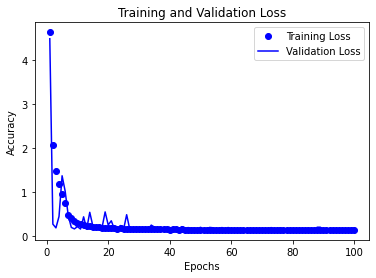

In [51]:
plot_model_history(regmodl1_history)

### Regression Model 2

In [56]:
# reg mod 2
def build_regmodl2():
  model = keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(30, activation="relu"),
    layers.Dense(5, activation="relu"),
    layers.Dense(1, activation="relu"),
  ])
  model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
  return model;

regmodl2 = build_regmodl2();

regmodl2_history = regmodl2.fit(x=Xtrain, y=train_labels, epochs=100, verbose=2, validation_data=(Xval, val_labels))

regmodl2.summary()

Epoch 1/100
153/153 - 1s - loss: 1.0490 - mae: 0.6933 - val_loss: 0.3725 - val_mae: 0.4564 - 1s/epoch - 8ms/step
Epoch 2/100
153/153 - 0s - loss: 0.3189 - mae: 0.4326 - val_loss: 0.1673 - val_mae: 0.3018 - 321ms/epoch - 2ms/step
Epoch 3/100
153/153 - 0s - loss: 0.2452 - mae: 0.3728 - val_loss: 0.2432 - val_mae: 0.3237 - 329ms/epoch - 2ms/step
Epoch 4/100
153/153 - 0s - loss: 0.2060 - mae: 0.3458 - val_loss: 0.1929 - val_mae: 0.3040 - 322ms/epoch - 2ms/step
Epoch 5/100
153/153 - 0s - loss: 0.1901 - mae: 0.3312 - val_loss: 0.2367 - val_mae: 0.4265 - 326ms/epoch - 2ms/step
Epoch 6/100
153/153 - 0s - loss: 0.1813 - mae: 0.3219 - val_loss: 0.2208 - val_mae: 0.3079 - 317ms/epoch - 2ms/step
Epoch 7/100
153/153 - 0s - loss: 0.1682 - mae: 0.3086 - val_loss: 0.1771 - val_mae: 0.2674 - 304ms/epoch - 2ms/step
Epoch 8/100
153/153 - 0s - loss: 0.1617 - mae: 0.3028 - val_loss: 0.1577 - val_mae: 0.2675 - 328ms/epoch - 2ms/step
Epoch 9/100
153/153 - 0s - loss: 0.1608 - mae: 0.3023 - val_loss: 0.1480 - 

Plotting Regression Model 2

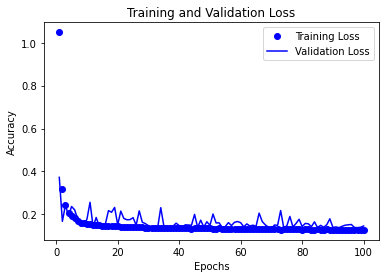

In [57]:
plot_model_history(regmodl2_history)

### Regression Model 3

In [54]:
# reg mod 3
def build_regmodl3():
  model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(125, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(30, activation="relu"),
    layers.Dense(5, activation="relu"),
    layers.Dense(1)                    
  ])
  model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
  return model;

regmodl3 = build_regmodl3()

regmodl3_history = regmodl3.fit(x=Xtrain, y=train_labels, epochs=100, verbose=2, validation_data=(Xval, val_labels))

regmodl3.summary()

Epoch 1/100
153/153 - 2s - loss: 0.7082 - mae: 0.6026 - val_loss: 0.2200 - val_mae: 0.3082 - 2s/epoch - 11ms/step
Epoch 2/100
153/153 - 0s - loss: 0.2761 - mae: 0.4083 - val_loss: 0.3368 - val_mae: 0.4355 - 482ms/epoch - 3ms/step
Epoch 3/100
153/153 - 1s - loss: 0.2167 - mae: 0.3586 - val_loss: 0.1835 - val_mae: 0.2761 - 514ms/epoch - 3ms/step
Epoch 4/100
153/153 - 0s - loss: 0.1853 - mae: 0.3268 - val_loss: 0.7708 - val_mae: 0.7823 - 438ms/epoch - 3ms/step
Epoch 5/100
153/153 - 0s - loss: 0.1783 - mae: 0.3186 - val_loss: 0.2644 - val_mae: 0.4682 - 479ms/epoch - 3ms/step
Epoch 6/100
153/153 - 1s - loss: 0.1688 - mae: 0.3126 - val_loss: 0.4577 - val_mae: 0.6015 - 531ms/epoch - 3ms/step
Epoch 7/100
153/153 - 0s - loss: 0.1634 - mae: 0.3059 - val_loss: 0.2523 - val_mae: 0.4537 - 456ms/epoch - 3ms/step
Epoch 8/100
153/153 - 1s - loss: 0.1593 - mae: 0.2994 - val_loss: 0.1775 - val_mae: 0.3785 - 560ms/epoch - 4ms/step
Epoch 9/100
153/153 - 0s - loss: 0.1579 - mae: 0.3008 - val_loss: 0.1816 -

Plotting Regression Model 3

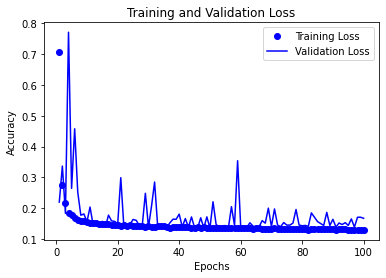

In [55]:
plot_model_history(regmodl3_history)